In [7]:
import os

# Define the path where you want to store the combined dataset
base_dir = "/mnt/data/papaya_dataset"

# Create the directory (if it doesn't exist)
os.makedirs(base_dir, exist_ok=True)

print(f"Directory '{base_dir}' created successfully!")


Directory '/mnt/data/papaya_dataset' created successfully!


In [8]:
import os
import zipfile
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define dataset paths
zip_files = {
    "/content/Papaya_Ripe.zip": "Ripe",
    "/content/Papaya_Classification.zip": "Classification",
    "/content/Papaya_Leaf.zip": "Leaf"
}

# Create a directory to store the combined dataset
base_dir = "/mnt/data/papaya_dataset"
os.makedirs(base_dir, exist_ok=True)

# Extract images and assign labels
for zip_path, label in zip_files.items():
    extract_path = os.path.join(base_dir, label)
    os.makedirs(extract_path, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("Extraction complete. Images are labeled and organized.")

# Splitting data into train, validation, and test sets
data_dir = base_dir
target_size = (150, 150)
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 train-validation split
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build a CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(zip_files), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

print("Model training complete!")


Extraction complete. Images are labeled and organized.
Found 719 images belonging to 3 classes.
Found 179 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.4796 - loss: 1.4550 - val_accuracy: 0.5754 - val_loss: 0.8029
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.6043 - loss: 0.6853 - val_accuracy: 0.5754 - val_loss: 0.7291
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.6237 - loss: 0.6720 - val_accuracy: 0.4581 - val_loss: 0.9423
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6417 - loss: 0.6242 - val_accuracy: 0.3799 - val_loss: 1.0156
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.6679 - loss: 0.5476 - val_accuracy: 0.4190 - val_loss: 0.8733
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6730 - loss: 0.5261 - val_accuracy: 0.4246 - val_loss: 0.8304
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6543 - loss: 0.5546 - val_accuracy: 0.3799 - val_loss: 1.1253
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6763 - loss: 0.5407 - val_accuracy: 0.4190 - val_loss:

In [16]:
import os
print(os.listdir(base_dir))  # Check class folders
for category in os.listdir(base_dir):
    print(f"{category}: {len(os.listdir(os.path.join(base_dir, category)))} images")


['Classification', 'Ripe', 'Leaf']
Classification: 1 images
Ripe: 1 images
Leaf: 98 images


In [17]:
image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]


In [18]:
import os

base_dir = "/mnt/data/papaya_dataset"

for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    print(f"\n🔹 Checking category: {category}")

    if os.path.isdir(category_path):
        sub_items = os.listdir(category_path)
        print(f"  Contains {len(sub_items)} items")
        print("  Sample items:", sub_items[:5])  # Show first 5 items



🔹 Checking category: Classification
  Contains 1 items
  Sample items: ['papaya_image']

🔹 Checking category: Ripe
  Contains 1 items
  Sample items: ['Citra Papaya']

🔹 Checking category: Leaf
  Contains 98 items
  Sample items: ['24.jpg', '64.jpg', '58.jpg', '31.jpg', '76.jpg']


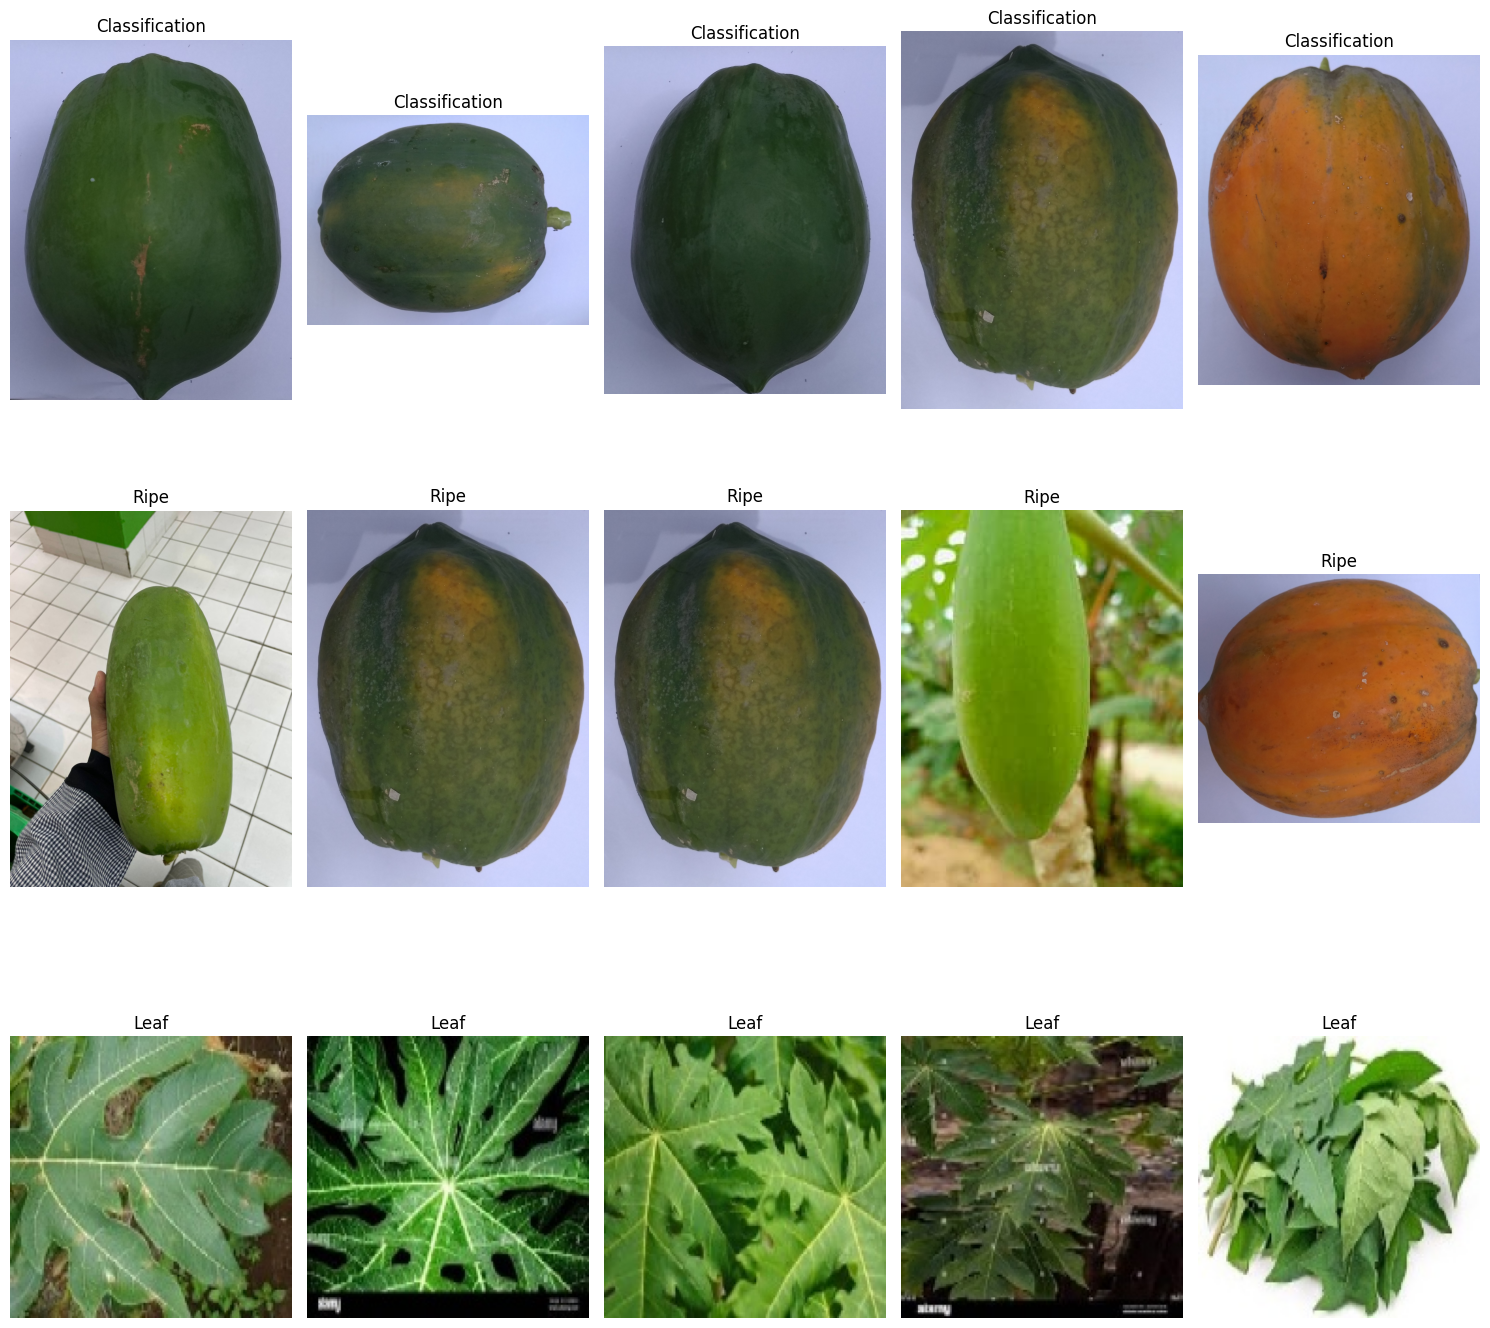

In [32]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Define dataset path
base_dir = "/mnt/data/papaya_dataset"
categories = ["Classification", "Ripe", "Leaf"]

# Create a dictionary to store image paths per category
category_images = {}

for category in categories:
    category_path = os.path.join(base_dir, category)
    image_files = []

    # Walk through directories to find images
    for root, _, files in os.walk(category_path):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):
                image_files.append(os.path.join(root, file))

    # Store images (if available)
    if image_files:
        category_images[category] = image_files

# Check if we found images
if not category_images:
    print("No images found in any category.")
else:
    # Define the number of images per category to display
    images_per_category = 5

    # Create a subplot for each category
    fig, axes = plt.subplots(len(category_images), images_per_category, figsize=(15, 5 * len(category_images)))

    # Ensure axes are iterable for a single category case
    if len(category_images) == 1:
        axes = [axes]

    for ax_row, (category, images) in zip(axes, category_images.items()):
        selected_images = random.sample(images, min(images_per_category, len(images)))

        for ax, img_path in zip(ax_row, selected_images):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(category)
            ax.axis("off")

    plt.tight_layout()
    plt.show()


In [21]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
base_dir = "/mnt/data/papaya_dataset"

# Define batch size and image size
batch_size = 32
img_height = 224
img_width = 224

# Create ImageDataGenerator for training (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",  # Use 'binary' if only 2 classes
    subset="training"
)

# Load validation data
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Get class indices (to verify labels)
print("Class labels:", train_generator.class_indices)


Found 719 images belonging to 3 classes.
Found 179 images belonging to 3 classes.
Class labels: {'Classification': 0, 'Leaf': 1, 'Ripe': 2}


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),  # Prevent overfitting
    Dense(len(train_generator.class_indices), activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the model
epochs = 10  # Increase for better results
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.4964 - loss: 1.4225 - val_accuracy: 0.6257 - val_loss: 0.6930
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.5514 - loss: 0.7252 - val_accuracy: 0.4413 - val_loss: 0.8586
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.6402 - loss: 0.6785 - val_accuracy: 0.4078 - val_loss: 0.7231
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.6577 - loss: 0.6107 - val_accuracy: 0.3966 - val_loss: 0.7874
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.6563 - loss: 0.5746 - val_accuracy: 0.4078 - val_loss: 1.1296
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.6483 - loss: 0.6253 - val_accuracy: 0.4246 - val_loss: 0.9146
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.6872 - loss: 0.5954 - val_accuracy: 0.4134 - val_loss: 1.0310
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.6405 - loss: 0.5716 - val_accuracy: 0.4637 - val_los

In [24]:
# Evaluate model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Save model for future use
model.save("/mnt/data/papaya_model.h5")


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3781 - loss: 1.1550


Validation Accuracy: 39.66%


In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pre-trained MobileNetV2
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")

# Freeze base layers
base_model.trainable = False

# Add custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation="softmax")
])

# Compile and train (same steps as before)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_generator, validation_data=val_generator, epochs=10)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.5400 - loss: 1.2554 - val_accuracy: 0.4246 - val_loss: 0.8687
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.6503 - loss: 0.5436 - val_accuracy: 0.4413 - val_loss: 0.9184
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7042 - loss: 0.4657 - val_accuracy: 0.4358 - val_loss: 1.0603
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7148 - loss: 0.4615 - val_accuracy: 0.4525 - val_loss: 1.0274
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7324 - loss: 0.4256 - val_accuracy: 0.4469 - val_loss: 0.9274
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.7215 - loss: 0.4341 - val_accuracy: 0.4358 - val_loss: 0.9421
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7146 - loss: 0.4206 - val_accuracy: 0.4358 - val_loss: 0.9522
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.7356 

In [33]:
# Evaluate model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Save model for future use
model.save("/mnt/data/papaya_model.h5")


6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4606 - loss: 1.1665


Validation Accuracy: 44.69%
